In [1]:
from qutip import *
import numpy as np

Setting parameters

In [2]:
# Defining the system Hamiltonian
Hsys = 0.5 * sigmaz()
# Initial state of the system.
rho0 = basis(2, 0) * basis(2, 0).dag()
tlist=np.linspace(0,10,100)
# defining Ohmic bath properties
alpha=0.05
T=1
wc=1
s=1


Obtaining an Ohmic Bath via Correlation functions

In [3]:
obp=heom.OhmicBath(T,sigmax(),alpha,wc,s,rmse=1e-4)

In [4]:
obp.summary()

Fit correlation class instance: 
 

Results of the fitting the Real Part with 3 terms:                |	 Results of the fitting the Imaginary Part with 3 terms:             
                                                                  |                                                                      
 Parameters|   lam    |  gamma   |   w0                           | 	 Parameters|   lam    |  gamma   |   w0                             
 1         | 4.12e-02 |-1.32e+00 |7.28e-18                        |	 1         |-5.16e-02 |-9.06e-01 |9.06e-02                           
 2         |-9.70e-03 |-4.87e+00 |4.80e+00                        | 	 2         | 3.78e-03 |-4.00e+00 |5.44e+00                          
 3         | 5.10e-03 |-2.86e-01 |6.65e-18                        | 	 3         |-5.16e-02 |-1.94e+00 |9.48e-01                          
                                                                  |                                                                     

In [5]:
options = {'nsteps':15000, 'store_states':True, 'rtol':1e-12, 'atol':1e-12, 'method':"bdf"}
HEOM_corr_fit = heom.HEOMSolver(Hsys, obp.fit.Bath_corr, max_depth=4, options=options)
result_corr=HEOM_corr_fit.run(rho0,tlist)

10.1%. Run time:   0.04s. Est. time left: 00:00:00:00
20.2%. Run time:   0.06s. Est. time left: 00:00:00:00
30.3%. Run time:   0.08s. Est. time left: 00:00:00:00
40.4%. Run time:   0.10s. Est. time left: 00:00:00:00
50.5%. Run time:   0.13s. Est. time left: 00:00:00:00
60.6%. Run time:   0.15s. Est. time left: 00:00:00:00
70.7%. Run time:   0.17s. Est. time left: 00:00:00:00
80.8%. Run time:   0.20s. Est. time left: 00:00:00:00
90.9%. Run time:   0.22s. Est. time left: 00:00:00:00
100.0%. Run time:   0.24s. Est. time left: 00:00:00:00
Total run time:   0.24s


Obtaining an Ohmic Bath via Spectral density

If the spectral method is specified than the Ohmic bath is obtained by fitting the ohmic spectral density 

In [18]:
obp2=heom.OhmicBath(T,sigmax(),alpha,wc,s,Nk=4,method='spectral',rmse=3e-5)

In [19]:
obp2.summary()

Results of the fitting the Spectral density with 4 terms: 
 
 Parameters|   lam    |  gamma   |   w0 
 1         |-6.78e-02 | 4.30e+00 |3.98e+00 
 2         | 1.22e-01 | 2.30e+00 |1.00e-01 
 3         | 1.63e-04 | 3.07e-01 |1.00e-01 
 4         | 9.24e-03 | 1.00e+00 |1.00e-01 
 
A  normalized RMSE of  6.47e-06 was obtained for the Spectral density 
 The current fit took  0.465765 seconds


In [20]:
HEOM_spectral_fit = heom.HEOMSolver(Hsys, obp2.fit.Bath_spec, max_depth=4, options=options)
result_spectral=HEOM_spectral_fit.run(rho0,tlist)

10.1%. Run time:   0.06s. Est. time left: 00:00:00:00
20.2%. Run time:   0.13s. Est. time left: 00:00:00:00
30.3%. Run time:   0.19s. Est. time left: 00:00:00:00
40.4%. Run time:   0.25s. Est. time left: 00:00:00:00
50.5%. Run time:   0.30s. Est. time left: 00:00:00:00
60.6%. Run time:   0.36s. Est. time left: 00:00:00:00
70.7%. Run time:   0.41s. Est. time left: 00:00:00:00
80.8%. Run time:   0.46s. Est. time left: 00:00:00:00
90.9%. Run time:   0.53s. Est. time left: 00:00:00:00
100.0%. Run time:   0.58s. Est. time left: 00:00:00:00
Total run time:   0.58s


Let us see the results from both ways of obtaining the ohmic bath parameters 

In [21]:
import matplotlib.pyplot as plt
def projection(result,i,j):
    return [result.states[k][i,j] for k in range(len(result.states))]

/home/mcditoos/anaconda3/envs/qutip-dev/lib/python3.12/site-packages/matplotlib/cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/home/mcditoos/anaconda3/envs/qutip-dev/lib/python3.12/site-packages/matplotlib/cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


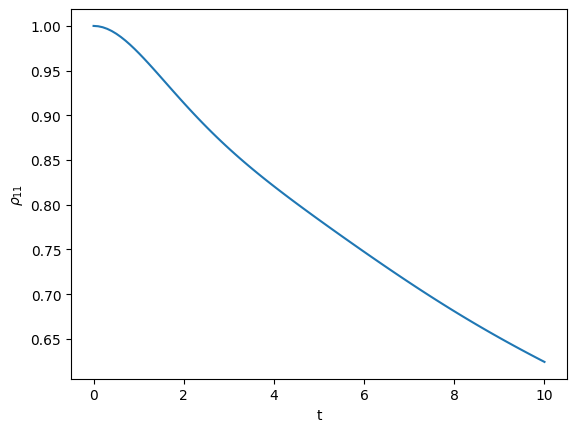

In [22]:
plt.plot(tlist,projection(result_spectral,0,0))
#plt.scatter(tlist,projection(result_corr,0,0),s=5,marker='x',color='red')
plt.xlabel('t')
plt.ylabel(r'$\rho_{11}$')
plt.show()

/home/mcditoos/anaconda3/envs/qutip-dev/lib/python3.12/site-packages/matplotlib/collections.py:194: ComplexWarning: Casting complex values to real discards the imaginary part
  offsets = np.asanyarray(offsets, float)


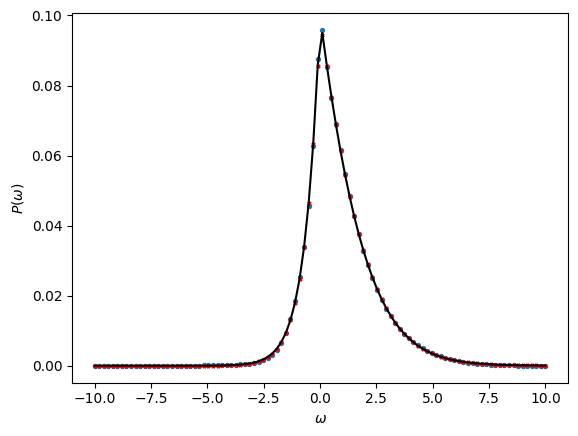

In [23]:
w=np.linspace(-10,10,100)
plt.scatter(w,obp.fit.corr_spectrum_approx(w),s=8)
plt.scatter(w,obp2.fit.spec_spectrum_approx(w),s=5,marker='x',color='red')
plt.plot(w,obp.ohmic_power_spectrum(w),color='k')
plt.ylabel(r'$P( \omega )$')
plt.xlabel(r'$\omega$')
plt.show()